# Lab 8 - Customer Analysis

## Activity 1 

Aggregate data into one Data Frame using Pandas.

In [152]:
import pandas as pd
print(pd.__version__)

insurance_df = pd.read_csv('/Users/Annie/Documents/GitHub/IronAnne/Labs/Pandas/file1.csv')
print(insurance_df)

insurance_df_two = pd.read_csv('/Users/Annie/Documents/GitHub/IronAnne/Labs/Pandas/file2.csv')
print(insurance_df_two)

#Are they the same? If no, then move on 
print(pd.DataFrame.equals(insurance_df, insurance_df_two))

#Check if columns are the same?
    #sometimes you have to rearrange columns, but Pandas is recognizing them automatically
print(insurance_df.columns)
print(insurance_df_two.columns)

insurance_df_all = pd.concat([insurance_df, insurance_df_two], axis=0, ignore_index=True)
print(insurance_df_all)


1.2.4
     Customer          ST GENDER             Education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
4003      NaN         NaN    NaN                   NaN   
4004      NaN         NaN    NaN                   NaN   
4005      NaN         NaN    NaN                   NaN   
4006      NaN         NaN    NaN                   NaN   
4007      NaN         NaN    NaN                   NaN   

     Customer Lifetime Value   Income  Monthly Premium Auto  \
0                        NaN      0.0                1000.0   
1                 697953.59%      0.0                  94.0   
2                1288743.17%  48767.0                 108.0   
3                 764586.18%      0.0        

Standardizing header names

In [153]:
#2.2. Standardizing header names
    # display the dataframe head
print(insurance_df_all.head(10))

#2.2.1. Convert column header to string
#df.columns = df.columns.astype("str")

#2.2.2. Format column header with cases
    #Index.str method
    #df.columns = df.columns.str.upper()
insurance_df_all.columns = insurance_df_all.columns.str.lower()
print(insurance_df_all)

###2.2.3. Rename columns

insurance_df_all_new = insurance_df_all.rename(columns = {'st': 'state'}, inplace = False)
print(insurance_df_all_new)

  Customer          ST GENDER             Education Customer Lifetime Value  \
0  RB50392  Washington    NaN                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   
5  OC83172      Oregon      F              Bachelor              825629.78%   
6  XZ87318      Oregon      F               College              538089.86%   
7  CF85061     Arizona      M                Master              721610.03%   
8  DY87989      Oregon      M              Bachelor             2412750.40%   
9  BQ94931      Oregon      F               College              738817.81%   

    Income  Monthly Premium Auto Number of Open Complaints     Policy Type  \
0      0.0                1000.0                    

Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data

In [154]:
insurance_df_all.drop(columns="customer", inplace=True)

Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints )

In [155]:
check_column_type = insurance_df_all_new.dtypes
print(check_column_type)

    #Fix column CLV
        ##Convert type with astype conversion method --> works only if data is clean and has no symbols (e. g. $) and if you want to convert a number to string
#insurance_df_all_new["customer lifetime value"].astype('str')

        #insurance_df_all_new['customer lifetime value'] = pd.to_numeric(insurance_df_all_new['customer lifetime value'])

def convert_column_clv(i):
    if i != i:
        pass 
    i = str(i).replace("%", "")
    return float(i)/100

#remove_percent = [i.replace('%','') for i in insurance_df_all_new["customer lifetime value"]]
#print(remove_percent[0:10])

insurance_df_all_new["customer lifetime value"] = insurance_df_all_new["customer lifetime value"].apply(convert_column_clv)
print(insurance_df_all_new["customer lifetime value"].head(10))


#test = insurance_df_all_new['customer lifetime value'].apply(lambda x: x.replace('%', '')).astype('float') / 100

def convert_column_complaints(i):
    if i != i:
        return 0
    i = str(i)
    return int(i[2])

insurance_df_all_new["number of open complaints"] = insurance_df_all_new["number of open complaints"].apply(convert_column_complaints)
print(insurance_df_all_new["number of open complaints"].head(100))


customer                      object
state                         object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object
0           NaN
1     6979.5359
2    12887.4317
3     7645.8618
4     5363.0765
5     8256.2978
6     5380.8986
7     7216.1003
8    24127.5040
9     7388.1781
Name: customer lifetime value, dtype: float64
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    0
97    0
98    3
99    0
Name: number of open complaints, Length: 100, dtype: int64


Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns

In [156]:
def update_column_state(i):
    if i != i:
        return i
    if str(i).endswith("li") == True:
        i = str(i).replace("Cali", "California")
    i = str(i).replace("AZ", "Arizona").replace("WA", "Washington")
    return str(i)

insurance_df_all_new["state"] = insurance_df_all_new["state"].apply(update_column_state)
print(insurance_df_all_new["state"].head(20))

print(insurance_df_all_new["state"].value_counts())


0     Washington
1        Arizona
2         Nevada
3     California
4     Washington
5         Oregon
6         Oregon
7        Arizona
8         Oregon
9         Oregon
10    California
11    California
12    California
13       Arizona
14    California
15        Oregon
16        Nevada
17    California
18        Oregon
19    California
Name: state, dtype: object
Oregon        623
California    608
Arizona       402
Nevada        223
Washington    211
Name: state, dtype: int64


Removing duplicates

In [157]:
print(insurance_df_all_new.drop_duplicates())

     customer       state gender             education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   
...       ...         ...    ...                   ...   
4999  HV85198     Arizona      M                Master   
5000  BS91566     Arizona      F               College   
5001  IL40123      Nevada      F               College   
5002  MY32149  California      F                Master   
5003  SA91515  California      M              Bachelor   

      customer lifetime value   income  monthly premium auto  \
0                         NaN      0.0                1000.0   
1                   6979.5359      0.0                  94.0   
2                  12887.4317  48767.0                 108.0   
3                   7645.8618      0.0         

Replacing null values – Replace missing values with means of the column (for numerical columns)

## Activity 2 

Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [158]:
def state_group(i):
    # checking for NaN. If x is NaN, return x
    if not i == i:
        return i
    
    else:

        dct_ = {'Washington':'west_coast',
                'Arizona':'midwest',
                'Nevada': 'midwest',
                'California':'west_coast',
                'Oregon':'west_coast',
               }
        
        return dct_[i]

insurance_df_all_new ['region'] = insurance_df_all_new['state'].apply(state_group)
insurance_df_all_new[['region', 'state']]

,region,state
0,west_coast,Washington
1,midwest,Arizona
2,midwest,Nevada
3,west_coast,California
4,west_coast,Washington
...,...,...
4999,midwest,Arizona
5000,midwest,Arizona
5001,midwest,Nevada
5002,west_coast,California


Standardizing the data – Use string functions to standardize the text data (lower case)

## Activity 3

In [159]:
#import new marketing file 
insurance_df2 = pd.read_csv('/Users/Annie/Documents/GitHub/IronAnne/Labs/Pandas/file3.csv')
print(insurance_df2.head())

   Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0           0  DK49336     Arizona              4809.216960       No   
1           1  KX64629  California              2228.525238       No   
2           2  LZ68649  Washington             14947.917300       No   
3           3  XL78013      Oregon             22332.439460      Yes   
4           4  QA50777      Oregon              9025.067525       No   

   Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0     Basic   College           2/18/11         Employed      M  ...   
1     Basic   College           1/18/11       Unemployed      F  ...   
2     Basic  Bachelor           2/10/11         Employed      M  ...   
3  Extended   College           1/11/11         Employed      M  ...   
4   Premium  Bachelor           1/17/11    Medical Leave      F  ...   

   Number of Open Complaints Number of Policies     Policy Type        Policy  \
0                        0.0                  9  Corp

**Which columns are numerical? Which columns are categorical?**

In [160]:
#numerical
def data_type_column_numerical():
    insurance_df2.select_dtypes(include=['int','float'])
    return True

In [161]:
insurance_df2.select_dtypes(include=['int','float'])

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [162]:
#categorical
insurance_df2.select_dtypes(include=['category', 'object'])

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


**Check and deal with NaN values. (Hint: Replacing null values – Replace missing values with means of the column (for numerical columns)).**

In [163]:
#Overview NaN values  
pd.DataFrame(100 * insurance_df2.isna().sum()/len(insurance_df2), columns=['percent nan'])

,percent nan
Unnamed: 0,0.000000
Customer,0.000000
State,5.783685
Customer Lifetime Value,0.000000
Response,5.783685
Coverage,0.000000
Education,0.000000
Effective To Date,0.000000
EmploymentStatus,0.000000
Gender,0.000000


In [164]:
#filter all columns with numerical values 
while data_type_column_numerical() == True: 
    insurance_df3 = insurance_df2.fillna(insurance_df2.mean())
    break
#null values of categorical columns stay null / empty 

In [165]:
insurance_df3.head(50)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.000000,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,...,3.000000,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,...,0.000000,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.000000,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
9,9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN


In [166]:
#check again NaN values
pd.DataFrame(100 * insurance_df3.isna().sum()/len(insurance_df3), columns=['percent nan'])

,percent nan
Unnamed: 0,0.000000
Customer,0.000000
State,5.783685
Customer Lifetime Value,0.000000
Response,5.783685
Coverage,0.000000
Education,0.000000
Effective To Date,0.000000
EmploymentStatus,0.000000
Gender,0.000000


**Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.**

In [167]:
from datetime import datetime
import pandas as pd
import numpy as np

#change dtype from "object" to datetime & check 
insurance_df3['Effective To Date'] = pd.to_datetime(insurance_df3['Effective To Date'])
print(insurance_df3['Effective To Date'].dtype)

'''How does python know the weird date format (M/DD/YY) and extract the right value?'''
#extract year, month and day to new columns:
    #df['year'] = df['date'].dt.year
    #df['day'] = df['date'].dt.day
    
insurance_df3['month'] = insurance_df3['Effective To Date'].dt.month
print(insurance_df3['month'])

#Filter the data and show only first quarter 
insurance_df3[(insurance_df3['month'] == 1) | (insurance_df3['month'] == 2) | (insurance_df3['month'] == 3)]


"""why does numpy not work?"""
"""insurance_df3[np.where(insurance_df3['Effective To Date'].isin([1,2])) == True]"""


datetime64[ns]
0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month, Length: 10910, dtype: int64


"insurance_df3[np.where(insurance_df3['Effective To Date'].isin([1,2])) == True]"

In [168]:
#Change format from numerical to categorical
insurance_df3["month"] = list(map(lambda date: date.strftime(format="%B"), insurance_df3["Effective To Date"]))
insurance_df3["month"]

0        February
1         January
2        February
3         January
4         January
           ...   
10905     January
10906     January
10907    February
10908    February
10909     January
Name: month, Length: 10910, dtype: object

**BONUS: Put all the previously mentioned data transformations into a function/functions.**

In [169]:
#def replace_NaN()
    ##select numerical columns (dtype)
    ##substitute with mean() for each column
    ##leave categorical as they are 
    
#def extract_months()
    #change object to datetime dtype 
    #extract months and insert in new column 
    #filter Jan, Feb, (Mar)
    #format number (2) to word (January)

# Activity 4

First, as an aid, you can find cheatsheets for Matplotlib and Seaborn below:
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
- [Colors Cheat Sheet]
(https://matplotlib.org/stable/tutorials/colors/colors.html)

In [208]:
# import libraries to use (pandas, numpy, matplotlib.pyplot and seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Show a plot of the total number of responses.**

In [222]:
#Bar chart with 2 bars (yes=1467/no=8814 (631 = blank)); value_counts 
#Visualisation as a stacked bar chart

num_response = insurance_df3["Response"].value_counts()
num_response

No     8813
Yes    1466
Name: Response, dtype: int64

<AxesSubplot:title={'center':'Total Number of Responses'}, ylabel='Response'>

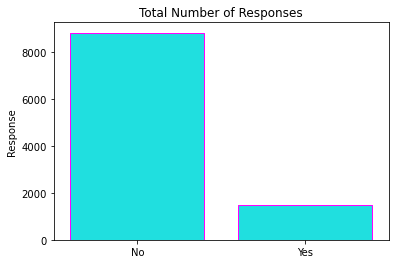

In [223]:
# create figure and axes with subplots()
fig1, ax1 = plt.subplots(1)

# set_title()
ax1.set_title("Total Number of Responses")

# plot the bar chart with bar() & create bars with different colors 
sns.barplot(x=num_response.index, y =num_response, color=("#00FFFF"),  edgecolor='magenta')

**2. Show a plot of the response rate by the sales channel.**

In [232]:
insurance_df3_without_nan = insurance_df3.dropna(subset = ["Response"], inplace=True)

In [252]:
#Get an overview and show responses per sales channel 
s_grouped = insurance_df3.groupby(['Sales Channel', 'Response'])['Customer'].count().reset_index()
s_grouped



,Sales Channel,Response,Customer
0,Agent,No,3148
1,Agent,Yes,742
2,Branch,No,2539
3,Branch,Yes,326
4,Call Center,No,1792
5,Call Center,Yes,221
6,Web,No,1334
7,Web,Yes,177


In [253]:
group_by_yes = s_grouped[s_grouped["Response"] == "Yes"]
group_by_yes

col_cust_list = group_by_yes['Customer'].tolist()
col_cust_list

[742, 326, 221, 177]

In [254]:
sales_channel_list = group_by_yes['Sales Channel'].tolist()
sales_channel_list

['Agent', 'Branch', 'Call Center', 'Web']

In [247]:
group_by_total = insurance_df3.groupby(['Sales Channel'])['Response'].count().reset_index()
group_by_total

group_by_total_list = group_by_total["Response"].tolist()
group_by_total_list

[3890, 2865, 2013, 1511]

In [269]:
response_rates = [i / j for i, j in zip(col_cust_list, group_by_total_list)]
response_rates

[0.19074550128534704,
 0.1137870855148342,
 0.10978638847491307,
 0.1171409662475182]

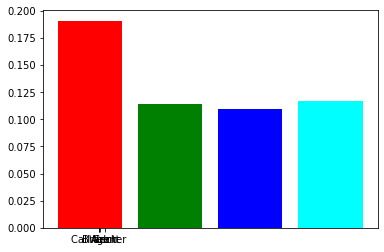

In [268]:
response_rates = [0.19074550128534704,
 0.1137870855148342,
 0.10978638847491307,
 0.1171409662475182]

channel = ['Agent', 'Branch', 'Call Center', 'Web']

# Create names on the x-axis
plt.xticks(response_rates, channel)

# Create bars with different colors
plt.bar(channel, response_rates, color=['red', 'green', 'blue', 'cyan'])

# Show graph
plt.show()

**Show a plot of the response rate by the total claim amount.**

In [276]:
insurance_df3["Total Claim Amount"].describe()

count    10279.000000
mean       435.736506
std        292.321294
min          0.099007
25%        272.788141
50%        384.000000
75%        548.327777
max       2893.239678
Name: Total Claim Amount, dtype: float64

<AxesSubplot:>

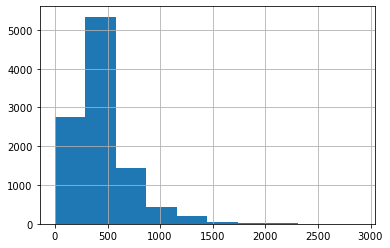

In [277]:
insurance_df3["Total Claim Amount"].hist()

**Show a plot of the response rate by income.**

In [279]:
#check percentiles and distribution to form income classes
insurance_df3["Income"].describe()

#write a function that attributes each value to a class
def groups():
    for i in insurance_df3["Income"]:
        if i < 33837 = "Low"
        elif 33837 > i < 62100.5 = "Middle"
        elif 62100.5 > i < 99981 = "High"

#create a new column = attribues each income to one of the 3 groups 
#get response rates: count yes responses in each class and divide by overall responses in each class

#deliverables 
responses_rates_per_income_class = [x, y, z]
income_classes = ["Low", "Middle", "High"]

SyntaxError: invalid syntax (<ipython-input-279-f79499becbd6>, line 4)

*Don't Limit your creativity! plot Any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed.*

Let's do an interactive map 

**Plot the Correlation Heatmap.**


                               Unnamed: 0  Customer Lifetime Value    Income  \
Unnamed: 0                       1.000000                -0.001973  0.007324   
Customer Lifetime Value         -0.001973                 1.000000  0.027544   
Income                           0.007324                 0.027544  1.000000   
Monthly Premium Auto            -0.000721                 0.403531 -0.011783   
Months Since Last Claim          0.006274                 0.016087 -0.021217   
Months Since Policy Inception    0.013372                 0.010915 -0.001657   
Number of Open Complaints        0.005139                -0.029076  0.004134   
Number of Policies               0.003552                 0.016925 -0.011334   
Total Claim Amount              -0.000316                 0.231934 -0.354541   

                               Monthly Premium Auto  Months Since Last Claim  \
Unnamed: 0                                -0.000721                 0.006274   
Customer Lifetime Value                

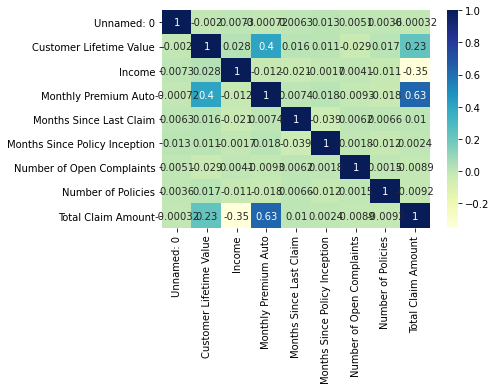

In [274]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(insurance_df3.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(insurance_df3.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

*Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.*